In [342]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error, classification_report, precision_score, recall_score, f1_score, r2_score
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler

In [343]:
import random
wine_dataset = pd.read_csv("WineQT.csv")
random.shuffle(wine_dataset.values)

y = wine_dataset.quality
X = wine_dataset.drop('quality', axis = 1)

X_train_wine, X_test_wine, y_train_wine, y_test_wine = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_wine, X_val_wine, y_train_wine, y_val_wine = train_test_split(X_train_wine, y_train_wine, test_size=0.2, random_state=42)

X_train_wine = X_train_wine.reset_index(drop=True)
X_val_wine = X_val_wine.reset_index(drop=True)
X_test_wine = X_test_wine.reset_index(drop=True)
y_train_wine = y_train_wine.reset_index(drop=True)
y_val_wine = y_val_wine.reset_index(drop=True)
y_test_wine = y_test_wine.reset_index(drop=True)

X_train_wine.fillna(X_train_wine.mean(), inplace=True)
X_val_wine.fillna(X_val_wine.mean(), inplace=True)
X_test_wine.fillna(X_test_wine.mean(), inplace=True)

std_scaler = StandardScaler()  
X_train_wine = std_scaler.fit_transform(X_train_wine)
X_val_wine = std_scaler.transform(X_val_wine)
X_test_wine = std_scaler.transform(X_test_wine)

In [344]:
y_train_wine[np.isin(y_train_wine, [3, 4, 5])] = 0
y_train_wine[np.isin(y_train_wine, [6, 7, 8])] = 1
y_val_wine[np.isin(y_val_wine, [3, 4, 5])] = 0
y_val_wine[np.isin(y_val_wine, [6, 7, 8])] = 1
y_test_wine[np.isin(y_test_wine, [3, 4, 5])] = 0
y_test_wine[np.isin(y_test_wine, [6, 7, 8])] = 1

In [345]:
df = pd.read_csv("HousingData.csv")
X = df.drop(columns=['MEDV'])
y = df['MEDV']

y = np.array(y)

X_train_housing, X_test_housing, y_train_housing, y_test_housing = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_housing, X_val_housing, y_train_housing, y_val_housing = train_test_split(X_train_housing, y_train_housing, test_size=0.2, random_state=42)
X_train_housing.fillna(X_train_housing.mean(), inplace=True)
X_val_housing.fillna(X_val_housing.mean(), inplace=True)
X_test_housing.fillna(X_test_housing.mean(), inplace=True)


std_scaler = StandardScaler()  
X_train_housing = std_scaler.fit_transform(X_train_housing)
X_val_housing = std_scaler.transform(X_val_housing)
X_test_housing = std_scaler.transform(X_test_housing)

y_train_housing = y_train_housing.reshape(-1,1)
y_test_housing = y_test_housing.reshape(-1,1)
y_val_housing = y_val_housing.reshape(-1,1)

In [367]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import numpy as np

class RandomForestClassifier:
    def __init__(self, n_estimators=100, max_depth=None, min_samples_split=2, min_samples_leaf=1):
        self.n_estimators = n_estimators
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.min_samples_leaf = min_samples_leaf
        self.estimators = []

    def set_params(self, n_estimators):
        self.n_estimators = n_estimators
        self.estimators = []

    def fit(self, X, y):
        for _ in range(self.n_estimators):
            # Create a decision tree classifier
            tree = DecisionTreeClassifier(
                max_depth=self.max_depth,
                min_samples_split=self.min_samples_split,
                min_samples_leaf=self.min_samples_leaf
            )
            
            # Randomly sample from the dataset
            sample_indices = np.random.choice(len(X), len(X), replace=False)
            X_sampled = X[sample_indices]
            y_sampled = y[sample_indices]

            # Fit the decision tree on the sampled data
            tree.fit(X_sampled, y_sampled)
            
            # Append the trained tree to the list of estimators
            self.estimators.append(tree)

    def predict(self, X):
        # Make predictions with each tree in the forest
        predictions = [estimator_.predict(X) for estimator_ in self.estimators]
        
        # Take the majority vote as the final prediction
        return np.round(np.mean(predictions, axis=0).astype(int))
    
    def accuracy(self, X, y):
        # Calculate the accuracy of the model
        y_pred = self.predict(X)
        return accuracy_score(y, y_pred)

rf_classifier = RandomForestClassifier(n_estimators=200, max_depth=10)
rf_classifier.fit(X_train_wine, y_train_wine)
accuracy = rf_classifier.accuracy(X_test_wine, y_test_wine)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.7162


In [368]:
# Define ranges for hyperparameters
n_estimators_values = [100, 200]
max_depth_values = [None, 5, 15]
min_samples_split_values = [2, 10]
min_samples_leaf_values = [1, 3]

best_accuracy = 0
best_params = {}

for n_estimators in n_estimators_values:
    for max_depth in max_depth_values:
        for min_samples_split in min_samples_split_values:
            for min_samples_leaf in min_samples_leaf_values:
                rf_classifier = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf)
                rf_classifier.fit(X_train_wine, y_train_wine)
                accuracy = rf_classifier.accuracy(X_test_wine, y_test_wine)
                if accuracy > best_accuracy:
                    best_accuracy = accuracy
                    best_params = {'n_estimators': n_estimators,'max_depth': max_depth,'min_samples_split': min_samples_split,'min_samples_leaf': min_samples_leaf}

print("Best Accuracy:", best_accuracy)
print("Best Parameters:", best_params)

Best Accuracy: 0.7729257641921398
Best Parameters: {'n_estimators': 100, 'max_depth': 5, 'min_samples_split': 10, 'min_samples_leaf': 1}


In [414]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

class RandomForestRegressor:
    def __init__(self, n_estimators=100, max_depth=None):
        self.n_estimators = n_estimators
        self.max_depth = max_depth
        self.trees = []
    
    def get_feature_importance(self, X, y):
        feature_importances = np.zeros(X.shape[1])
        for tree in self.trees:
            feature_importances += tree.feature_importances_

        feature_importances
        return feature_importances

    def set_params(self, n_estimators):
        self.n_estimators = n_estimators
        self.trees = []

    def fit(self, X, y):
        for _ in range(self.n_estimators):
            sample_indices = np.random.choice(len(X), len(X), replace=True)
            X_sampled = X[sample_indices]
            y_sampled = y[sample_indices]

            tree = DecisionTreeRegressor(max_depth=self.max_depth)
            tree.fit(X_sampled, y_sampled)
            self.trees.append(tree)

    def predict(self, X):
        predictions = [tree.predict(X) for tree in self.trees]  
        return np.mean(predictions, axis=0)

    def calculate_mse(self, X, y):
        return mean_squared_error(y, self.predict(X))

    def calculate_r_squared(self, X, y):
        return r2_score(y, self.predict(X))

rf_regression = RandomForestRegressor(n_estimators=100, max_depth=3)
rf_regression.fit(X_train_housing, y_train_housing)
mse = rf_regression.calculate_mse(X_test_housing, y_test_housing)
r_squared = rf_regression.calculate_r_squared(X_test_housing, y_test_housing)

print(f"Mean Squared Error: {mse:.4f}")
print(f"R-squared: {r_squared:.4f}")

Mean Squared Error: 17.6208
R-squared: 0.7597


In [370]:
n_estimators_values = [50, 100, 200]
max_depth_values = [None, 5, 10, 15]

best_mse = float('inf')
best_params = None

for n_estimators in n_estimators_values:
    for max_depth in max_depth_values:
        rf_regressor = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth)
        rf_regressor.fit(X_train_housing, y_train_housing)
        y_pred_val = rf_regressor.predict(X_val_housing)
        mse = mean_squared_error(y_val_housing, y_pred_val)
        if mse < best_mse:
            best_mse = mse
            best_params = {'n_estimators': n_estimators, 'max_depth': max_depth}

print(f"\nBest Hyperparameters: {best_params}")
print(f"Best Mean Squared Error on Validation Set: {best_mse:.4f}")


Best Hyperparameters: {'n_estimators': 50, 'max_depth': 10}
Best Mean Squared Error on Validation Set: 16.3703


In [371]:
from sklearn.tree import DecisionTreeClassifier
import numpy as np

# References: https://web.stanford.edu/~hastie/Papers/samme.pdf, https://www.youtube.com/watch?v=LsK-xG1cLYA, https://chat.openai.com/share/6a7316dd-0618-47f0-9508-3fbfca51ee52

class AdaBoostClassifierMulticlass:
    def __init__(self, n_estimators):
        self.n_estimators = n_estimators
        self.estimators = []
        self.errors = []
        self.classes = None

    def set_params(self, n_estimators):
        self.n_estimators = n_estimators
        self.estimators = []

    def fit(self, X, y):
        self.classes = np.unique(y)
        sample_weights = np.ones(len(X)) / len(X)

        for _ in range(self.n_estimators):
            estimator = DecisionTreeClassifier(random_state=42, max_depth=10)
            estimator.fit(X, y, sample_weight=sample_weights)
            y_pred = estimator.predict(X)
            err = np.sum(sample_weights * (y_pred != y)) / np.sum(sample_weights)
            self.errors.append(err)
            estimator_weight = np.log((1 - err) / max(err, 1e-12)) + np.log(len(self.classes) - 1)
            self.estimators.append((estimator, estimator_weight))
            sample_weights *= np.exp(estimator_weight * (y_pred != y))
            sample_weights /= np.sum(sample_weights)

    def predict(self, X):
        outputs = np.zeros((len(self.classes), len(X))) # Combine predictions from all weak learners

        for estimator, estimator_weight in self.estimators:
            y_pred = estimator.predict(X)

            for i, c in enumerate(self.classes):
                one_hot_pred = (y_pred == c)
                outputs[i] += estimator_weight * one_hot_pred

        final_predictions = np.argmax(outputs, axis=0)
        return final_predictions

    def accuracy(self, X, y):
        y_pred = self.predict(X)
        return np.mean(y == y_pred)

adaboost = AdaBoostClassifierMulticlass(n_estimators=5)
adaboost.fit(X_train_wine, y_train_wine)
accuracy = adaboost.accuracy(X_test_wine, y_test_wine)
print(f"Test Accuracy: {accuracy}")

Test Accuracy: 0.7510917030567685


In [373]:
n_estimators_values = [50, 100, 200]

best_accuracy = 0
best_n_estimators = None

for n_estimators in n_estimators_values:
    adaboost = AdaBoostClassifierMulticlass(n_estimators=n_estimators)
    adaboost.fit(X_train_wine, y_train_wine)
    accuracy = adaboost.accuracy(X_test_wine, y_test_wine)
    
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_n_estimators = n_estimators

print("Best Accuracy:", best_accuracy)
print("Best n_estimators:", best_n_estimators)

Best Accuracy: 0.7641921397379913
Best n_estimators: 50


In [421]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Implementation for AdaBoostRegressor followed from Adaboost.R2 algorithm prescribed in https://www.cs.utexas.edu/~dpardoe/papers/ICML10.pdf

class AdaBoostRegressor:
    def __init__(self, n_estimators):
        self.n_estimators = n_estimators
        self.estimators = []
        self.weights = []

    def set_params(self, n_estimators):
        self.n_estimators = n_estimators
        self.weights = []

    def get_feature_importance(self, X, y):
        feature_importances = np.zeros(X.shape[1])
        for tree in self.estimators:
            feature_importances += tree[0].feature_importances_

        feature_importances
        return feature_importances

    def fit(self, X, y):
        n = len(X)
        weights = np.ones(n) / n

        for i in range(self.n_estimators):

            regressor = DecisionTreeRegressor()
            regressor.fit(X, y, sample_weight=weights)
            y = y.ravel()

            absolute_errors = np.abs(y - regressor.predict(X))
            max_absolute_error = np.max(absolute_errors)
            adjusted_errors = absolute_errors / max_absolute_error

            total_error = np.sum(weights * adjusted_errors)
            beta_t = total_error / (1 - total_error)
            self.estimators.append((regressor, beta_t))

            if total_error >= 0.5:
                self.n_estimators = i - 1
                self.estimators = self.estimators[:i-1]
                break


            weights *= np.power(beta_t, 1 - adjusted_errors)
            weights /= np.sum(weights)

            self.weights.append(np.log(1/beta_t))

    def predict(self, X_test):
        len_test = len(X_test)
        fitted_values = np.empty((len_test, self.n_estimators))
        for t, (tree, beta_t) in enumerate(self.estimators):
            fitted_values[:, t] = tree.predict(X_test)

        predictions = []
        for n in range(len_test):
            prediction = self.weighted_median(fitted_values[n], self.weights)
            predictions.append(prediction)
    
        return predictions

    # Computing the weighted mean given data and weights for each data point across all estimators: https://chat.openai.com/share/6a7316dd-0618-47f0-9508-3fbfca51ee52
    def weighted_median(self, data, weights):
        sorted_data = [value for value, _ in sorted(zip(data, weights), key=lambda x: x[0])]
        sorted_weights = [weight for _, weight in sorted(zip(data, weights), key=lambda x: x[0])]

        total_weight = sum(sorted_weights)
        cumulative_weight = 0.0

        for value, weight in zip(sorted_data, sorted_weights):
            cumulative_weight += weight
            if cumulative_weight >= total_weight / 2.0:
                return value

        return -1

booster = AdaBoostRegressor(100)

booster.fit(X_train_housing, y_train_housing)
output = booster.predict(X_test_housing)

print(r2_score(y_test_housing, output))
print(mean_squared_error(y_test_housing, output))

0.8239890475663959
12.907549019607842


In [375]:
n_estimators_values = [50, 100, 200]

# tune the regressor over the number of estimators for r2 score and mse
best_r2_score = float('-inf')
best_n_estimators_r2 = None
best_n_estimators_mse = None
best_mse = float('inf')

for n_estimators in n_estimators_values:
    booster = AdaBoostRegressor(n_estimators=n_estimators)
    booster.fit(X_train_housing, y_train_housing)

    output = booster.predict(X_val_housing)
    r2_score_ = r2_score(y_val_housing, output)
    mse = mean_squared_error(y_val_housing, output)

    if r2_score_ > best_r2_score:
        best_r2_score = r2_score_
        best_n_estimators_r2 = n_estimators

    if mse < best_mse:
        best_mse = mse
        best_n_estimators_mse = n_estimators

print("Best R2 Score:", best_r2_score)
print("Best n_estimators for R2 Score:", best_n_estimators_r2)
print("Best MSE:", best_mse)
print("Best n_estimators for MSE:", best_n_estimators_mse)

Best R2 Score: 0.7706356927018666
Best n_estimators for R2 Score: 50
Best MSE: 16.30777777777778
Best n_estimators for MSE: 50


In [418]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# References: https://www.youtube.com/watch?v=3CC4N4z3GJc, https://medium.com/mlearning-ai/gradient-boosting-for-regression-from-scratch-bba968c16c57, 

class GradientBoostingRegressor:
    def __init__(self, n_estimators, learning_rate):
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.trees = []

    def set_params(self, n_estimators):
        self.n_estimators = n_estimators
        self.trees = []

    def get_feature_importance(self, X, y):
        feature_importances = np.zeros(X.shape[1])
        for tree in self.trees:
            feature_importances += tree.feature_importances_

        feature_importances
        return feature_importances

    def fit(self, X, y):
        y = y.ravel()

        initial_prediction = np.mean(y)
        residuals = y - initial_prediction

        for _ in range(self.n_estimators):
            tree = DecisionTreeRegressor(max_leaf_nodes=10)
            tree.fit(X, residuals)

            residual_predictions = tree.predict(X)
            residuals -= self.learning_rate * residual_predictions

            self.trees.append(tree)

    def predict(self, X):
        predictions = np.full(X.shape[0], np.mean(y))

        for tree in self.trees:
            predictions += self.learning_rate * tree.predict(X)

        return predictions
    
    def mse(self, X, y):
        return mean_squared_error(y, self.predict(X))

learning_rate = 0.1
n_estimators = 50
gradient_boosting_regressor = GradientBoostingRegressor(n_estimators=n_estimators, learning_rate=learning_rate)
gradient_boosting_regressor.fit(X_train_housing, y_train_housing)

val_predictions = gradient_boosting_regressor.predict(X_val_housing)

mse = gradient_boosting_regressor.mse(X_val_housing, y_val_housing)
print(f"Validation Mean Squared Error: {mse}")

test_predictions = gradient_boosting_regressor.predict(X_test_housing)

mse_test = gradient_boosting_regressor.mse(X_test_housing, y_test_housing)
print(f"Test Mean Squared Error: {mse_test}")

r2_score_ = r2_score(y_val_housing, val_predictions)
print(f"Validation R2 Score: {r2_score_}")

r2_score_ = r2_score(y_test_housing, test_predictions)
print(f"Test R2 Score: {r2_score_}")

Validation Mean Squared Error: 15.032917550344651
Test Mean Squared Error: 9.911641774029647
Validation R2 Score: 0.7885662432006352
Test R2 Score: 0.8648420775952506


In [377]:
n_estimators_values = [50, 100, 200]
learning_rate_values = [0.01, 0.05, 0.1, 0.15]

best_mse = float('inf')
best_params = {}

for n_estimators in n_estimators_values:
    for learning_rate in learning_rate_values:
        gradient_boost = GradientBoostingRegressor(n_estimators=n_estimators, learning_rate=learning_rate)
        gradient_boost.fit(X_train_housing, y_train_housing)
        mse = gradient_boost.mse(X_val_housing, y_val_housing)
        
        if mse < best_mse:
            best_mse = mse
            best_params = {
                'n_estimators': n_estimators,
                'learning_rate': learning_rate
            }

print("Best MSE:", best_mse)
print("Best Parameters:", best_params)

Best MSE: 11.307336372466768
Best Parameters: {'n_estimators': 100, 'learning_rate': 0.15}


In [378]:
import numpy as np
import pandas as pd 
from sklearn.tree import DecisionTreeRegressor 
from sklearn.preprocessing import OneHotEncoder

# Reference: https://www.youtube.com/watch?v=StWY5QWMXCw, https://randomrealizations.com/posts/gradient-boosting-multi-class-classification-from-scratch/index.html

class GradientBoostingClassifier():
    def __init__(self, n_estimators, learning_rate=0.1, max_depth=1):
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.max_depth = max_depth
        
    def set_params(self, n_estimators):
        self.n_estimators = n_estimators
        self.boosters = []

    def softmax(self, raw_predictions):
        return np.exp(raw_predictions) / np.sum(np.exp(raw_predictions), axis=1).reshape(-1, 1)
    
    def _one_hot_encode_labels(self, y):
        ohe = OneHotEncoder()
        y_one_hot_enc = ohe.fit_transform(y.reshape(-1, 1)).toarray()
        return y_one_hot_enc
    
    def gradient(self, y_one_hot_enc, probabilities):
        return y_one_hot_enc - probabilities
    
    def calc_hessian(self, probabilities): 
        return probabilities * (1 - probabilities)
    
    def accuracy(self, X, y):
        y_pred = self.predict(X)
        return np.mean(y == y_pred)
    
    def fit(self, X, y):
        self.n_classes = np.unique(y).shape[0]
        y_one_hot_enc = self._one_hot_encode_labels(y.values)

        raw_predictions = np.zeros(y_one_hot_enc.shape)
        probabilities = self.softmax(raw_predictions)
        self.boosters = []

        for m in range(self.n_estimators):
            tree_sets = []
            for k in range(self.n_classes):
                negative_gradients = self.gradient(y_one_hot_enc[:, k], probabilities[:, k])
                hessians = self.calc_hessian(probabilities[:, k])
                tree = DecisionTreeRegressor(max_depth=self.max_depth)
                tree.fit(X, negative_gradients)

                self._update_terminal_nodes(tree, X, negative_gradients, hessians)
                raw_predictions[:, k] += self.learning_rate * tree.predict(X)
                probabilities = self.softmax(raw_predictions)

                tree_sets.append(tree)

            self.boosters.append(tree_sets)
        
    def _update_terminal_nodes(self, tree, X, negative_gradients, hessians):
        leaf_nodes = np.nonzero(tree.tree_.children_left == -1)[0]
        leaf_node_for_each_sample = tree.apply(X)

        for leaf in leaf_nodes:
            samples_in_this_leaf = np.where(leaf_node_for_each_sample == leaf)[0]

            neg_gradients_leaf = negative_gradients[samples_in_this_leaf]
            hessians_leaf = hessians[samples_in_this_leaf]

            # Avoid division by zero
            sum_hessians = np.sum(hessians_leaf)
            if sum_hessians != 0:
                val = np.sum(neg_gradients_leaf) / sum_hessians
                tree.tree_.value[leaf, 0, 0] = val
            else:
                # Handle the case when sum_hessians is zero
                tree.tree_.value[leaf, 0, 0] = 0.0 
          
    def predict_proba(self, X):
        raw_predictions =  np.zeros(shape=(X.shape[0], self.n_classes))

        for k in range(self.n_classes):
            for booster in self.boosters:
                pred = booster[k].predict(X)
                raw_predictions[:, k] += self.learning_rate * pred

        probabilities = self.softmax(raw_predictions)
        return probabilities
        
    def predict(self, X):
        probabilities = self.predict_proba(X)
        return np.argmax(probabilities, axis=1)

In [379]:
gradient_boosting_classifier = GradientBoostingClassifier(n_estimators=10,learning_rate=0.1,max_depth=6)
gradient_boosting_classifier.fit(X_train_wine, y_train_wine)

y_pred = gradient_boosting_classifier.predict(X_test_wine)
accuracy = gradient_boosting_classifier.accuracy(X_test_wine, y_test_wine)
print(f"Accuracy on test-dataset: {accuracy}")

Accuracy on test-dataset: 0.759825327510917


In [380]:
# Tuning the classifier over the number of estimators, learning rate and max depth for accuracy
best_accuracy = 0
best_params = {}

n_estimators_values = [50, 100, 200]
learning_rate_values = [0.01, 0.05, 0.1]
max_depth_values = [1, 3, 7, 9]

for n_estimators in n_estimators_values:
    for learning_rate in learning_rate_values:
        for max_depth in max_depth_values:
            gradient_boosting_classifier = GradientBoostingClassifier(n_estimators=n_estimators, learning_rate=learning_rate, max_depth=max_depth)
            gradient_boosting_classifier.fit(X_train_wine, y_train_wine)
            accuracy = gradient_boosting_classifier.accuracy(X_val_wine, y_val_wine)
            
            if accuracy > best_accuracy:
                best_accuracy = accuracy
                best_params = {
                    'n_estimators': n_estimators,
                    'learning_rate': learning_rate,
                    'max_depth': max_depth
                }

print("Best Accuracy:", best_accuracy)
print("Best Parameters:", best_params)

Best Accuracy: 0.8142076502732241
Best Parameters: {'n_estimators': 200, 'learning_rate': 0.1, 'max_depth': 3}


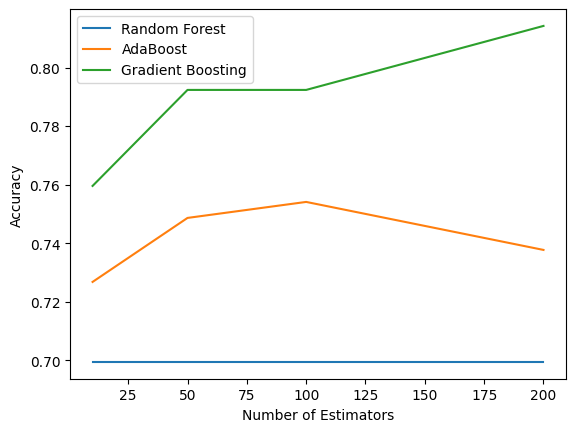

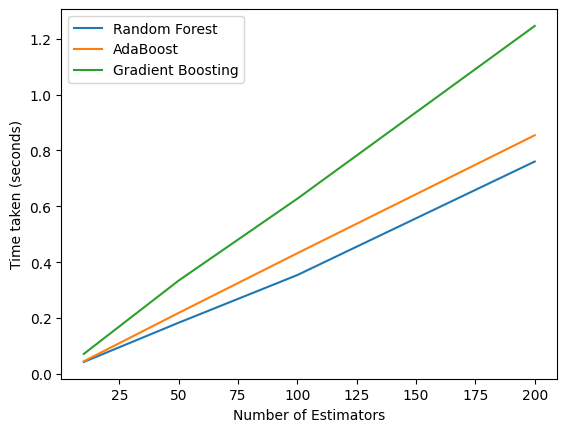

In [381]:
import time
import matplotlib.pyplot as plt

best_random_forest_classifier = RandomForestClassifier(n_estimators=100, max_depth=5, min_samples_split=10, min_samples_leaf=1)
best_adaboost_classifier = AdaBoostClassifierMulticlass(n_estimators=50)
best_gradient_boosting_classifier = GradientBoostingClassifier(n_estimators=200, learning_rate=0.1, max_depth=3)

models = []
models.append(('Random Forest', best_random_forest_classifier))
models.append(('AdaBoost', best_adaboost_classifier))
models.append(('Gradient Boosting', best_gradient_boosting_classifier))

accuracies_random_forest = []
accuracies_adaboost = []
accuracies_gradient_boosting = []

time_random_forest = []
time_adaboost = []
time_gradient_boosting = []

num_estimators = [10, 50, 100, 200]

for name, model in models:
    
    for n_estimators in num_estimators:
        start_time = time.time()
        model.set_params(n_estimators=n_estimators)
        model.fit(X_train_wine, y_train_wine)
        predictions = model.predict(X_val_wine)
        accuracy = accuracy_score(y_val_wine, predictions)
        end_time = time.time()
        time_taken = end_time - start_time
        
        if name == 'Random Forest':
            accuracies_random_forest.append(accuracy)
            time_random_forest.append(time_taken)
        elif name == 'AdaBoost':
            accuracies_adaboost.append(accuracy)
            time_adaboost.append(time_taken)
        else:
            accuracies_gradient_boosting.append(accuracy)
            time_gradient_boosting.append(time_taken)

plt.plot(num_estimators, accuracies_random_forest, label='Random Forest')
plt.plot(num_estimators, accuracies_adaboost, label='AdaBoost')
plt.plot(num_estimators, accuracies_gradient_boosting, label='Gradient Boosting')
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(num_estimators, time_random_forest, label='Random Forest')
plt.plot(num_estimators, time_gradient_boosting, label='AdaBoost')
plt.plot(num_estimators, time_adaboost, label='Gradient Boosting')

plt.xlabel('Number of Estimators')
plt.ylabel('Time taken (seconds)')
plt.legend()
plt.show()

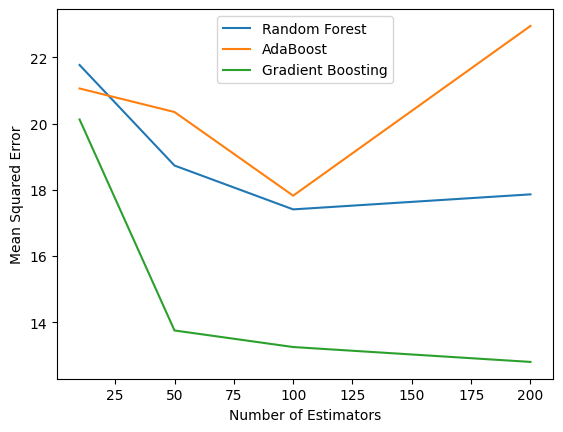

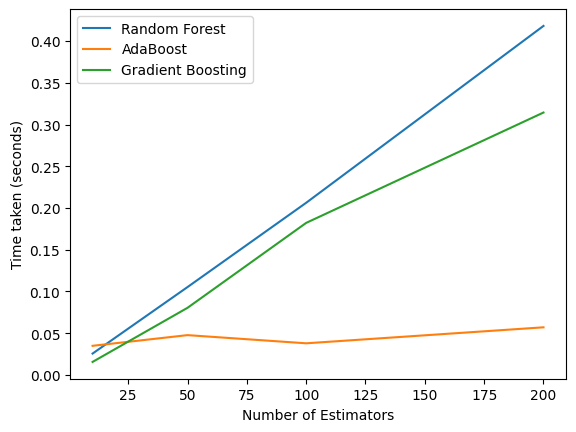

In [382]:
# Do similar analysis for my models of regressors built from scratch

import time
import matplotlib.pyplot as plt

best_random_forest_regressor = RandomForestRegressor(n_estimators=50, max_depth=10)
best_adaboost_regressor = AdaBoostRegressor(n_estimators=50)
best_gradient_boosting_regressor = GradientBoostingRegressor(n_estimators=100, learning_rate=0.15)

models = []
models.append(('Random Forest', best_random_forest_regressor))
models.append(('AdaBoost', best_adaboost_regressor))
models.append(('Gradient Boosting', best_gradient_boosting_regressor))

mse_random_forest = []
mse_adaboost = []
mse_gradient_boosting = []

time_random_forest = []
time_adaboost = []
time_gradient_boosting = []

num_estimators = [10, 50, 100, 200]

for name, model in models:
    for n_estimators in num_estimators:
        start_time = time.time()
        model.set_params(n_estimators=n_estimators)
        model.fit(X_train_housing, y_train_housing)
        predictions = model.predict(X_val_housing)
        mse = mean_squared_error(y_val_housing, predictions)
        end_time = time.time()
        time_taken = end_time - start_time
        
        if name == 'Random Forest':
            mse_random_forest.append(mse)
            time_random_forest.append(time_taken)
        elif name == 'AdaBoost':
            mse_adaboost.append(mse)
            time_adaboost.append(time_taken)
        else:
            mse_gradient_boosting.append(mse)
            time_gradient_boosting.append(time_taken)

plt.plot(num_estimators, mse_random_forest, label='Random Forest')
plt.plot(num_estimators, mse_adaboost, label='AdaBoost')
plt.plot(num_estimators, mse_gradient_boosting, label='Gradient Boosting')
plt.xlabel('Number of Estimators')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()

plt.plot(num_estimators, time_random_forest, label='Random Forest')
plt.plot(num_estimators, time_adaboost, label='AdaBoost')
plt.plot(num_estimators, time_gradient_boosting, label='Gradient Boosting')

plt.xlabel('Number of Estimators')
plt.ylabel('Time taken (seconds)')
plt.legend()
plt.show()

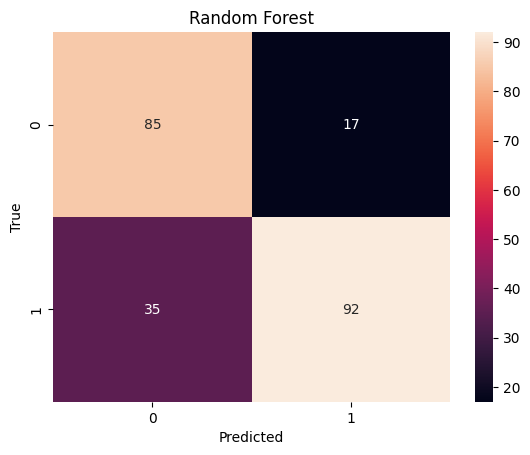

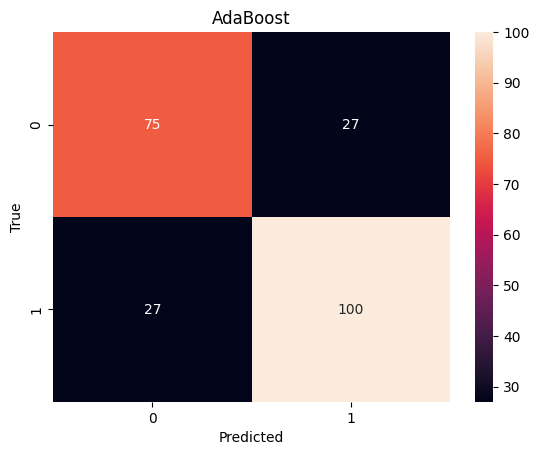

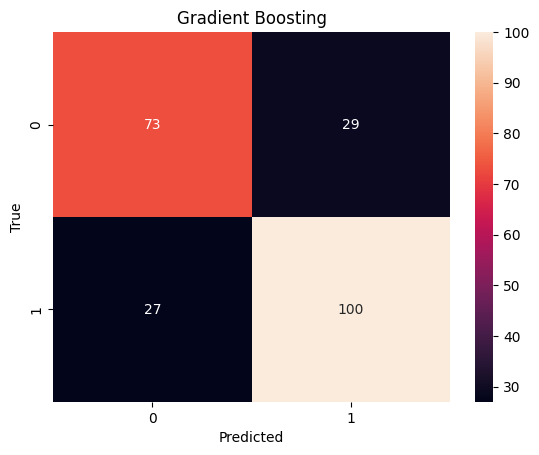

In [384]:
# Give code for computing the confusion matrix for the best model of all classifiers built from scratch and plotting for all classifiers side by side for comparison

from sklearn.metrics import confusion_matrix
import seaborn as sns

best_random_forest_classifier = RandomForestClassifier(n_estimators=100, max_depth=5, min_samples_split=10, min_samples_leaf=1)
best_adaboost_classifier = AdaBoostClassifierMulticlass(n_estimators=50)
best_gradient_boosting_classifier = GradientBoostingClassifier(n_estimators=200, learning_rate=0.1, max_depth=3)

models = []
models.append(('Random Forest', best_random_forest_classifier))
models.append(('AdaBoost', best_adaboost_classifier))
models.append(('Gradient Boosting', best_gradient_boosting_classifier))

for name, model in models:
    model.fit(X_train_wine, y_train_wine)
    predictions = model.predict(X_test_wine)
    confusion_matrix_ = confusion_matrix(y_test_wine, predictions)
    sns.heatmap(confusion_matrix_, annot=True, fmt='g')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(name)
    plt.show()

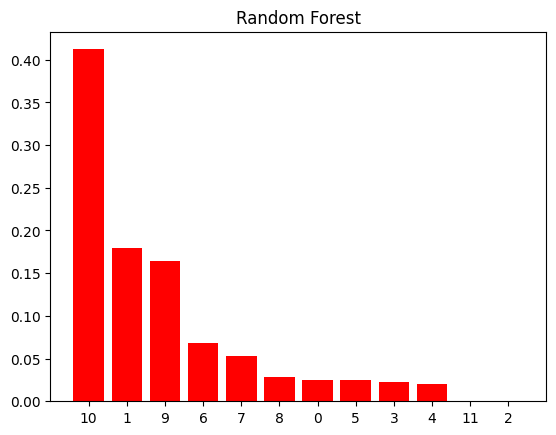

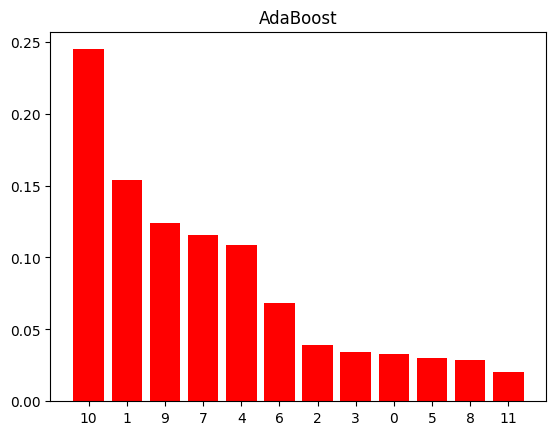

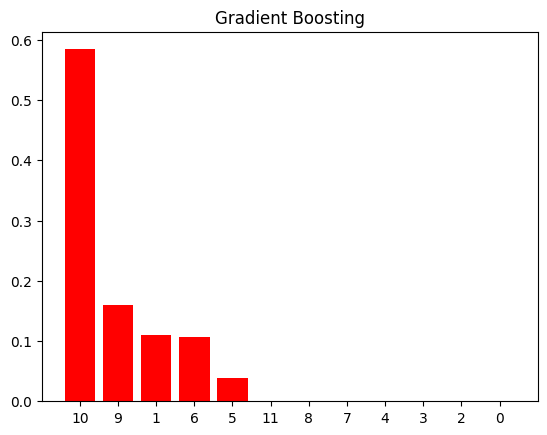

In [386]:
# Write code to get Feature Importances for Adaboost, GradientBoosting and RandomForest classification and plot them side by side

import matplotlib.pyplot as plt
import numpy as np

best_random_forest_classifier = RandomForestClassifier(n_estimators=100, max_depth=5, min_samples_split=10, min_samples_leaf=1)
best_adaboost_classifier = AdaBoostClassifierMulticlass(n_estimators=50)
best_gradient_boosting_classifier = GradientBoostingClassifier(n_estimators=200, learning_rate=0.1, max_depth=3)

models = []
models.append(('Random Forest', best_random_forest_classifier))
models.append(('AdaBoost', best_adaboost_classifier))
models.append(('Gradient Boosting', best_gradient_boosting_classifier))

for name, model in models:
    model.fit(X_train_wine, y_train_wine)
    if name == 'Random Forest':
        importances = model.estimators[0].feature_importances_
    elif name == 'AdaBoost':
        importances = model.estimators[0][0].feature_importances_
    else:
        importances = model.boosters[0][0].feature_importances_

    indices = np.argsort(importances)[::-1]
    plt.figure()
    plt.title(name)
    plt.bar(range(X_train_wine.shape[1]), importances[indices], color="r", align="center")
    plt.xticks(range(X_train_wine.shape[1]), indices)
    plt.xlim([-1, X_train_wine.shape[1]])
    plt.show()

# Classification Model Analysis

### 1. Similar Feature Importances:
Features 10, 1, and 9 consistently appear as the most important features across all classifiers.
The fact that these features are consistently ranked highly indicates that they carry significant information for the classification task.

### 2. Consistency Across Classifiers:
The fact that the rankings are similar across different ensemble methods (Adaboost, Gradient Boosting, Random Forest) suggests that these features are likely crucial for the dataset rather than being model-specific artifacts.
This consistency strengthens the case for the importance of these features.

### 3. Possible Implications:
Feature 10: Being consistently the most important suggests that it might have a strong influence on the binary classification task. Further analysis or domain knowledge may reveal why this feature is crucial.
Feature 1 and 9: The high importance of these features indicates that they also contribute significantly to the classification decisions.

### 4. Correctness of Classifiers:
The fact that all three classifiers (Adaboost, Gradient Boosting, Random Forest) show similar feature importances suggests that they are capturing similar patterns in the data. This consistency can be seen as a validation of the correctness of the implemented classifiers.

In [409]:
predictions_adaboost = best_adaboost_classifier.predict(X_val_wine)
predictions_gradient_boosting = best_gradient_boosting_classifier.predict(X_val_wine)
predictions_random_forest = best_random_forest_classifier.predict(X_val_wine)

misclassifications_adaboost = np.where(predictions_adaboost != y_val_wine)[0]
misclassifications_gradient_boosting = np.where(predictions_gradient_boosting != y_val_wine)[0]
misclassifications_random_forest = np.where(predictions_random_forest != y_val_wine)[0]

# Step 3: Extract Feature Information
features_of_mistakes_adaboost = X_val_wine[misclassifications_adaboost, :]
features_of_mistakes_gradient_boosting = X_val_wine[misclassifications_gradient_boosting, :]
features_of_mistakes_random_forest = X_val_wine[misclassifications_random_forest, :]

# Step 4: Aggregate Feature Information (Common Mistakes)
common_mistakes = np.intersect1d(misclassifications_adaboost, np.intersect1d(misclassifications_gradient_boosting, misclassifications_random_forest))
common_mistakes_features = X_val_wine[common_mistakes, :]

print("Number of common mistakes:", len(common_mistakes))
print("Number of mistakes made by Adaboost:", len(misclassifications_adaboost))
print("Number of mistakes made by Gradient Boosting:", len(misclassifications_gradient_boosting))
print("Number of mistakes made by Random Forest:", len(misclassifications_random_forest))

Number of common mistakes: 19
Number of mistakes made by Adaboost: 46
Number of mistakes made by Gradient Boosting: 34
Number of mistakes made by Random Forest: 55


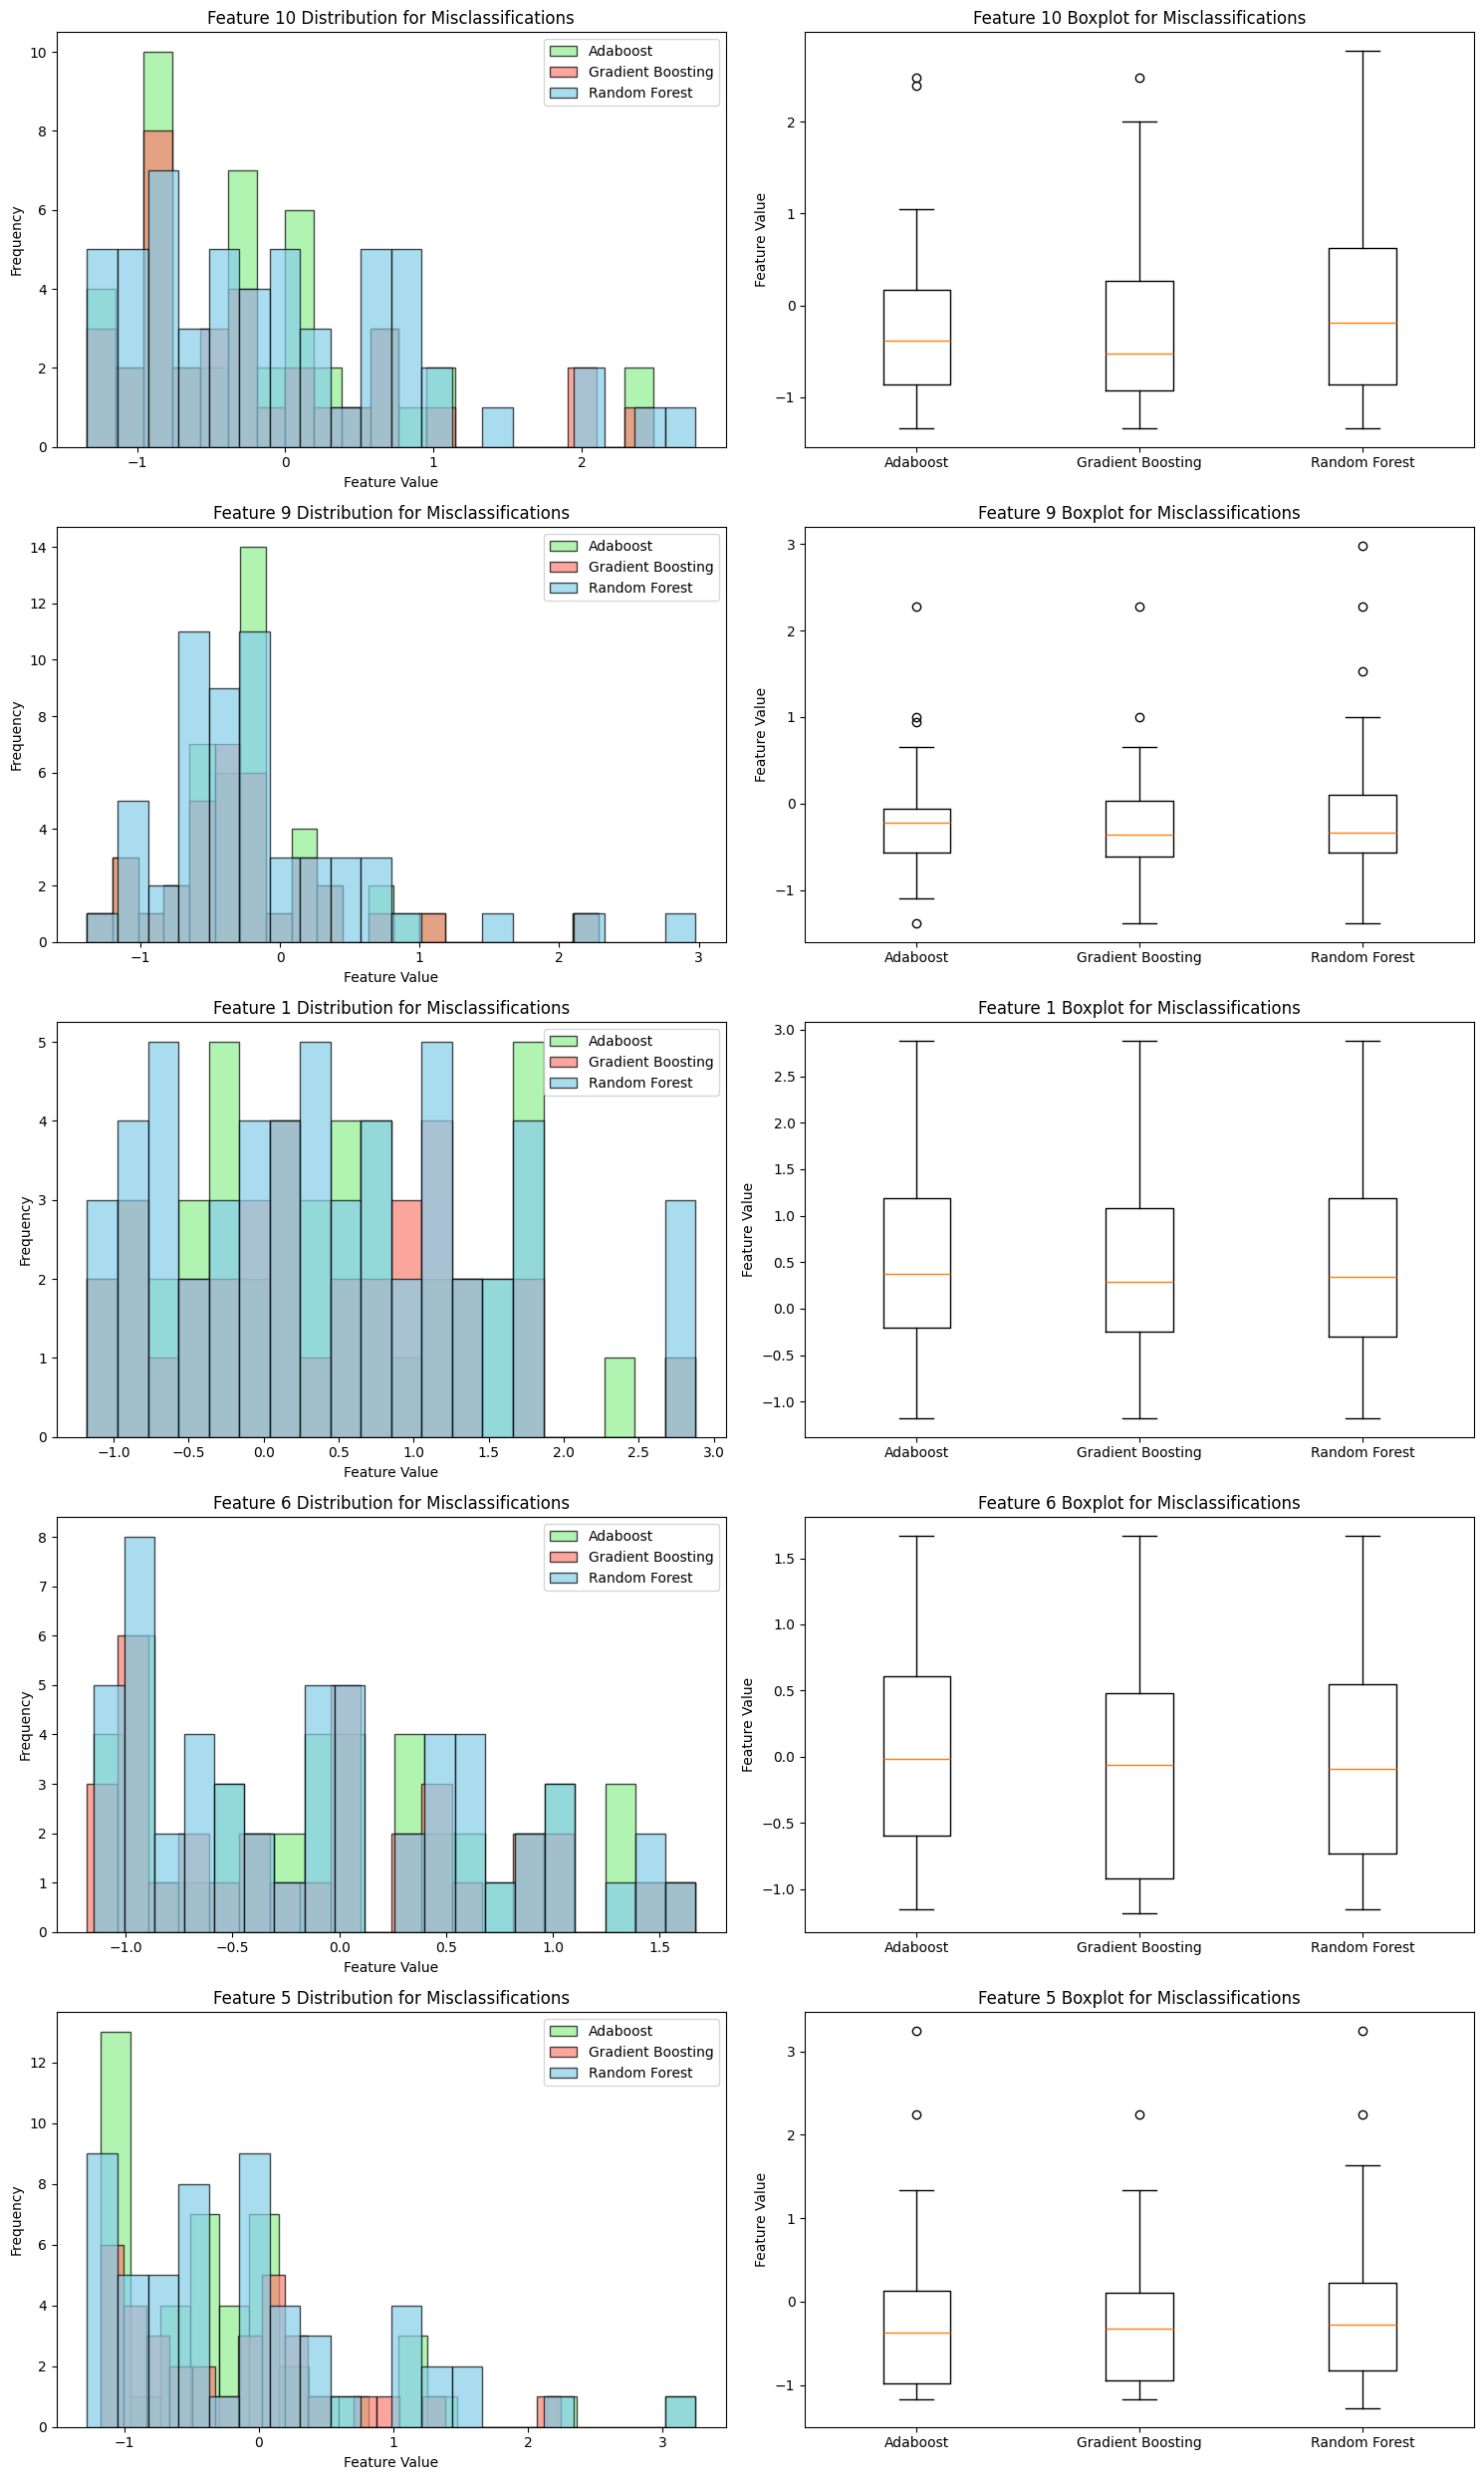

In [412]:
max_display_features = 5 

# Choose the top 5 features based on importance
top_features = np.argsort(importances)[::-1][:max_display_features]

plt.figure(figsize=(15, 5 * max_display_features))

for i, feature_idx in enumerate(top_features):
    plt.subplot(max_display_features, 2, 2*i + 1)
    plt.hist(features_of_mistakes_adaboost[:, feature_idx], bins=20, color='lightgreen', edgecolor='black', alpha=0.7, label='Adaboost')
    plt.hist(features_of_mistakes_gradient_boosting[:, feature_idx], bins=20, color='salmon', edgecolor='black', alpha=0.7, label='Gradient Boosting')
    plt.hist(features_of_mistakes_random_forest[:, feature_idx], bins=20, color='skyblue', edgecolor='black', alpha=0.7, label='Random Forest')
    plt.title(f'Feature {feature_idx} Distribution for Misclassifications')
    plt.xlabel('Feature Value')
    plt.ylabel('Frequency')
    plt.legend()

    plt.subplot(max_display_features, 2, 2*i + 2)
    plt.boxplot([features_of_mistakes_adaboost[:, feature_idx], 
                 features_of_mistakes_gradient_boosting[:, feature_idx], 
                 features_of_mistakes_random_forest[:, feature_idx]], labels=['Adaboost', 'Gradient Boosting', 'Random Forest'])
    plt.title(f'Feature {feature_idx} Boxplot for Misclassifications')
    plt.ylabel('Feature Value')

plt.tight_layout()
plt.show()

# Classification Model Analysis

## Key Observations:

### Histograms: 
##### 1. The histograms show the distribution of each selected feature for misclassifications.                                                                             
##### 2. Different colors represent different classifiers (Adaboost, Gradient Boosting, Random Forest). The histograms provide insights into how the feature values contribute to misclassifications for each classifier.

## Boxplots:

##### 1. The boxplots summarize the distribution of feature values for misclassifications in a compact form.
##### 2. They display the median, quartiles, and potential outliers for each classifier.
##### 3. The boxplots provide insights into how the feature values contribute to misclassifications for each classifier.

## Feature Importance:

##### Features are selected based on their importance scores. The higher the importance, the more influence the feature has on the model's predictions. This analysis focuses on the top features, providing a more concise view of the most influential features for misclassifications.

## Interpretation:
##### Consistent Patterns: The histograms and boxplots for a feature across classifiers are similar, it indicates a consistent pattern in how that feature contributes to misclassifications. This consistency may suggest that the classifiers share similarities in how they handle certain features.

# Lets perform analysis for our implemented regression models trained on Housing dataset.

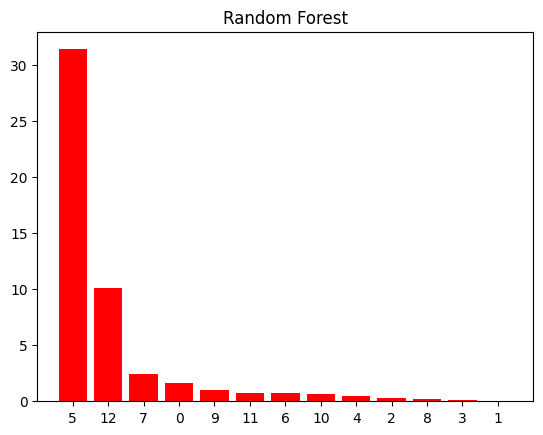

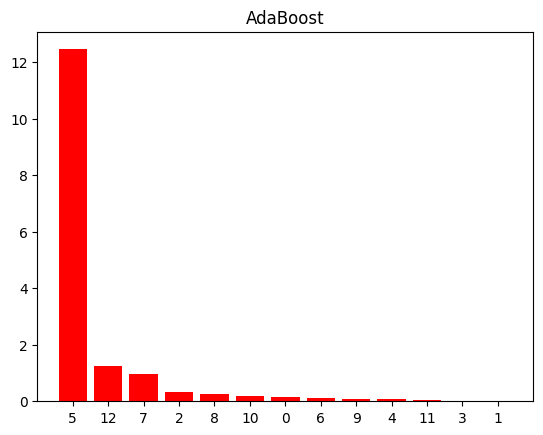

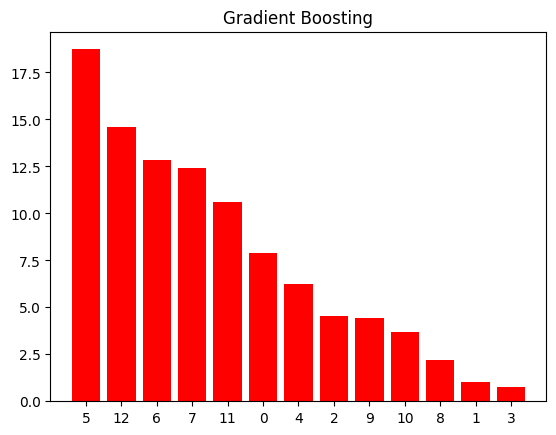

MSE of Adaboost: 18.541975308641977
MSE of Gradient Boosting: 13.244285977060754
MSE of Random Forest: 17.472830624984354
Number of common mistakes: 81
Number of mistakes made by Adaboost: 6541
Number of mistakes made by Gradient Boosting: 6561
Number of mistakes made by Random Forest: 6561


In [430]:
# I want to get feature importances for my models of regressors built from scratch and plot them side by side

import matplotlib.pyplot as plt
import numpy as np

best_random_forest_regressor = RandomForestRegressor(n_estimators=50, max_depth=10)
best_adaboost_regressor = AdaBoostRegressor(n_estimators=50)
best_gradient_boosting_regressor = GradientBoostingRegressor(n_estimators=100, learning_rate=0.15)

models = []
models.append(('Random Forest', best_random_forest_regressor))
models.append(('AdaBoost', best_adaboost_regressor))
models.append(('Gradient Boosting', best_gradient_boosting_regressor))

for name, model in models:
    model.fit(X_train_housing, y_train_housing)
    importances = model.get_feature_importance(X_train_housing, y_train_housing)

    indices = np.argsort(importances)[::-1]
    plt.figure()
    plt.title(name)
    plt.bar(range(X_train_housing.shape[1]), importances[indices], color="r", align="center")
    plt.xticks(range(X_train_housing.shape[1]), indices)
    plt.xlim([-1, X_train_housing.shape[1]])
    plt.show()

predictions_adaboost = best_adaboost_regressor.predict(X_val_housing)
predictions_gradient_boosting = best_gradient_boosting_regressor.predict(X_val_housing)
predictions_random_forest = best_random_forest_regressor.predict(X_val_housing)

mse_adaboost = mean_squared_error(y_val_housing, predictions_adaboost)
mse_gradient_boosting = mean_squared_error(y_val_housing, predictions_gradient_boosting)
mse_random_forest = mean_squared_error(y_val_housing, predictions_random_forest)

print("MSE of Adaboost:", mse_adaboost)
print("MSE of Gradient Boosting:", mse_gradient_boosting)
print("MSE of Random Forest:", mse_random_forest)

features_of_mistakes_adaboost = X_val_housing[np.where(predictions_adaboost != y_val_housing)[0], :]
features_of_mistakes_gradient_boosting = X_val_housing[np.where(predictions_gradient_boosting != y_val_housing)[0], :]
features_of_mistakes_random_forest = X_val_housing[np.where(predictions_random_forest != y_val_housing)[0], :]

common_mistakes = np.intersect1d(np.where(predictions_adaboost != y_val_housing)[0], np.intersect1d(np.where(predictions_gradient_boosting != y_val_housing)[0], np.where(predictions_random_forest != y_val_housing)[0]))
common_mistakes_features = X_val_housing[common_mistakes, :]
print("Number of common mistakes:", len(common_mistakes))
print("Number of mistakes made by Adaboost:", len(np.where(predictions_adaboost != y_val_housing)[0]))
print("Number of mistakes made by Gradient Boosting:", len(np.where(predictions_gradient_boosting != y_val_housing)[0]))
print("Number of mistakes made by Random Forest:", len(np.where(predictions_random_forest != y_val_housing)[0]))

# Regression Model Analysis

## I analyzed and compared three regression models: Random Forest, AdaBoost, and Gradient Boosting. Here's the breakdown of observations and analysis:

### Feature Importances

#### Similar Feature Importance Patterns
- The feature importance plots for Random Forest, AdaBoost, and Gradient Boosting are roughly similar.
- Feature 5 has the highest importance across all three models, indicating its significant impact on predictions.
- Features 7 and 12 follow as the next important features.

#### Consistency Across Models
- Consistent appearance of features in the top importance list suggests their robust contribution to predictive performance.
- Consistency in feature importance across models indicates their relevance for predicting the target variable.

### Analysis and Interpretation

#### Feature 5 Significance
- High importance of Feature 5 implies strong influence on the target variable.

#### Consistent Feature Importance
- Consistency in feature importance across models strengthens evidence of their importance.
- Consistency increases confidence in the relevance of identified important features.

#### Common Mistakes
- Analysis of common mistakes across models can provide insights into instances where all models struggle.